In [1]:
#importing the packages
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing haarcascade files
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eyes_cascade = cv2.CascadeClassifier("./Train/third-party/haarcascade_mcs_eyepair_big.xml")
nose_cascade = cv2.CascadeClassifier("./Train/third-party/haarcascade_mcs_nose.xml")

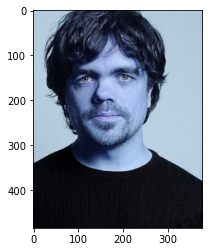

In [3]:
# Reading the image using openCV
img = cv2.imread('Test/Before.png')
gray_frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

#Displaying the image using matplotlib.pyplot
plt.imshow(img)
plt.show()

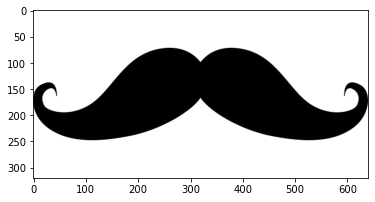

In [4]:
#Reading mustache and glasses using openCV
mustache = cv2.imread('Train/mustache.png',-1)
glasses = cv2.imread('Train/glasses.png',-1)

#Displaying the mustache
plt.imshow(mustache)
plt.show()

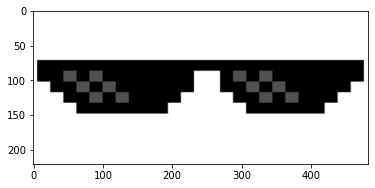

In [5]:
#Displaying the glasses
plt.imshow(glasses)
plt.show()

In [6]:
faces = face_cascade.detectMultiScale(gray_frame, 1.3, 5)
print(faces)
for (x,y,w,h) in faces:
    face_section = gray_frame[y:y+h, x:x+w]
    face = img[y:y+h, x:x+w]

    eyes = eyes_cascade.detectMultiScale(face_section,1.3,5)
    print(eyes)
    for(ex,ey,ew,eh) in eyes:

        eyes_section = face_section[ey:ey+eh, ex:ex+w]

        new_glasses = cv2.resize(glasses.copy(),(int(1.1*ew),int(2.5*eh)))
        
        gw, gh, gc = new_glasses.shape
        for i in range(0,gw):
            for j in range(0,gh):
                if new_glasses[i,j][3] != 0:
                    face[ ey - int(eh/1.5)+i , int(ex)+j] = new_glasses[i, j]




    nose = nose_cascade.detectMultiScale(face_section, 1.3, 5)
    print(nose)
    for (nx, ny, nw, nh) in nose:
        nose_section= face_section[ny: ny+nh, nx:nx+nw]
        new_mustache = cv2.resize(mustache.copy(),(int(1.2*nw),int(0.5*ny)))

        mw, mh, mc = new_mustache.shape
        for i in range(0,mw):
            for j in range(0,mh):
                if new_mustache[i,j][3] != 0:
                    face[ny + int(nh/1.5)+i, int(nx)+j] = new_mustache[i,j]


[[ 59  69 204 204]]
[[ 18  60 167  41]]
[[ 68 100  55  46]]


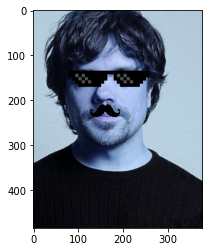

In [7]:
#Displaying the result
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
plt.imshow(img)
plt.show()

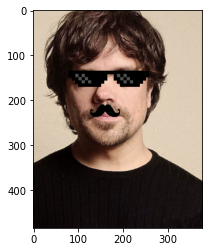

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [9]:
img = np.reshape(img , (-1,3))
print((img))
cv2.waitKey(0)
cv2.destroyAllWindows()

[[219 202 180]
 [220 203 181]
 [219 202 180]
 ...
 [ 19  13  13]
 [ 21  15  15]
 [ 22  15  15]]


In [10]:
dfa = pd.DataFrame({"Prediction (R, G , B)" : list(img)})
print(dfa)

       Prediction (R, G , B)
0            [219, 202, 180]
1            [220, 203, 181]
2            [219, 202, 180]
3            [220, 203, 181]
4            [219, 202, 180]
...                      ...
182840          [23, 17, 17]
182841          [20, 14, 14]
182842          [19, 13, 13]
182843          [21, 15, 15]
182844          [22, 15, 15]

[182845 rows x 1 columns]


In [11]:
dfa.to_csv('answer.csv',index = False)

In [12]:
df= pd.read_csv("answer.csv")
print(df)

       Prediction (R, G , B)
0              [219 202 180]
1              [220 203 181]
2              [219 202 180]
3              [220 203 181]
4              [219 202 180]
...                      ...
182840            [23 17 17]
182841            [20 14 14]
182842            [19 13 13]
182843            [21 15 15]
182844            [22 15 15]

[182845 rows x 1 columns]
